In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
def p(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-0.5*(x - 0.5)**2)

In [3]:
def g(c, x):
    return 1+c*x
def h(c, x):
    return p(x)/(p(x) + abs(c)*p(g(c, x)))
def L(c, x):
    return -1*np.log(0.00001+h(c, x))*p(x)-np.log(0.00001+1-h(c, x))*p(g(c, x))*abs(c)

In [4]:
loss = []
result = 0
for c in np.linspace(-3, 3):
    result, error = integrate.quad(lambda x: L(c, x), -10, 10)
    loss.append(result)

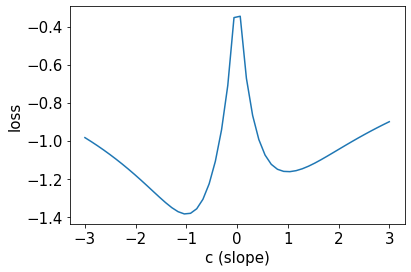

In [5]:
plt.rc('font', size=15)
plt.plot(np.linspace(-3, 3), -np.array(loss))
plt.xlabel("c (slope)")
plt.ylabel("loss")
plt.savefig("restrictedZ2.pdf",  bbox_inches='tight')

In [110]:
xx = np.random.normal(0.5,1.,10000)

mylosses=[]
for c in np.linspace(-2,2,1000):
    
    yy = g(c,xx)
    mylosses += [np.mean(-np.log(0.000000001+h(c, xx)) - np.log(0.000000001+1.-h(c, yy)))]

Text(0, 0.5, 'loss')

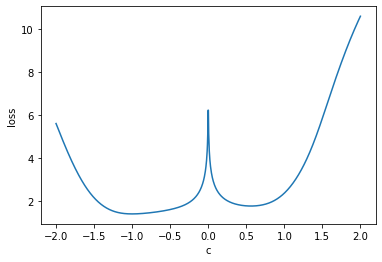

In [111]:
plt.plot(np.linspace(-2,2,1000),mylosses)
plt.xlabel("c")
plt.ylabel("loss")

(1.38, 1.4)

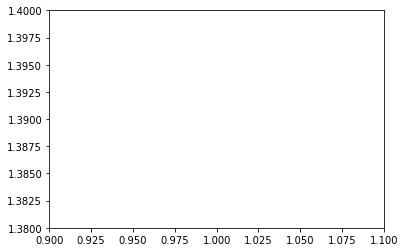

In [112]:
plt.plot(np.linspace(-2,2,1000),mylosses)
plt.xlim([0.9,1.1])
plt.ylim([1.38,1.4])

(1.6, 2.2)

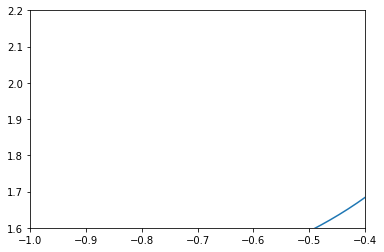

In [113]:
plt.plot(np.linspace(-2,2,1000),mylosses)
plt.xlim([-1,-0.4])
plt.ylim([1.6,2.2])

In [114]:
def p(x,mu,sigma):
    return (1./np.sqrt(2*np.pi*sigma**2))*np.exp(-(x - mu)**2/(2.*sigma**2))

In [115]:
def g(a, b, x):
    return a + b*x
def h(a, b, x):
    return p(x,0.5,1)/(p(x,0.5,1) + p(x,0.5*b+a,b))
    #return p(x,0.5,1)/(p(x,0.5,1) + abs(b)*p(a+b*x,0.5,1))

In [116]:
xx = np.random.normal(0.5,1.,10000)

mylosses=[]
for b in np.linspace(-3,3,100):
    mylosses+=[[]]
    for a in np.linspace(-3,3,100):

        yy = g(a, b, xx)
        mylosses[-1] += [np.mean(-np.log(0.000001+h(a, b, xx)) - np.log(0.000001+1.-h(a, b, yy)))]
        pass
    pass
mylosses = np.array(mylosses)

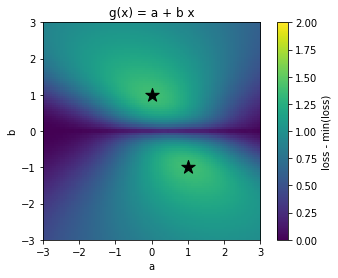

In [117]:
c = plt.imshow(mylosses,extent=[-3,3,-3,3],vmin=0,vmax=2,origin="lower")
#c = plt.imshow(mylosses,extent=[-2,2,-2,2],vmin=0,vmax=2,origin="lower")
cbar = plt.colorbar(c)
cbar.ax.set_ylabel('loss - min(loss)')
plt.title("g(x) = a + b x")
plt.xlabel("a")
plt.ylabel("b")
plt.scatter(0,1,s=200, marker='*',color="black")
plt.scatter(1,-1,s=200, marker='*',color="black")

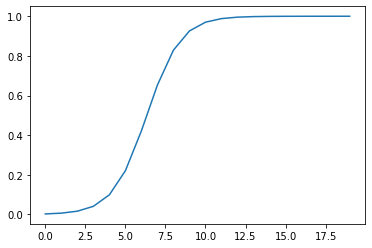

In [118]:
plt.plot(h(-2,-1,np.linspace(-3,3,20)))

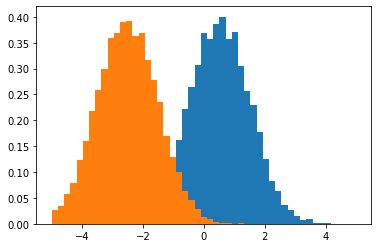

In [121]:
#plt.plot(np.linspace(-3,3,200),p(np.linspace(-3,3,200)))
xx = np.random.normal(0.5,1.,10000)
n1,_,_=plt.hist(xx,density=True,bins=np.linspace(-5,5,50))

yy = g(-2, -1, xx)
n2,b,_=plt.hist(yy,density=True,bins=np.linspace(-5,5,50))
#plt.plot(np.linspace(-5,5,50),p(g(-2,-1,np.linspace(-5,5,50))))

/Users/bpnachman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


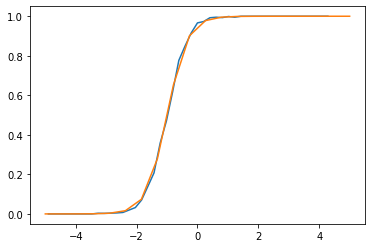

In [122]:
plt.plot(0.5*(b[1:]+b[0:-1]),n1/(n1+n2))
plt.plot(np.linspace(-5,5,20),h(-2,-1,np.linspace(-5,5,20)))

In [123]:
xx = np.random.normal(0.5,1.,10000)
yy = g(4, 1, xx)
yy2 = g(4, -1, xx)

(array([  10.,  109.,  526., 1792., 2998., 2748., 1364.,  392.,   55.,
           6.]),
 array([-0.38676928,  0.40945599,  1.20568125,  2.00190652,  2.79813179,
         3.59435706,  4.39058232,  5.18680759,  5.98303286,  6.77925813,
         7.5754834 ]),
 <a list of 10 Patch objects>)

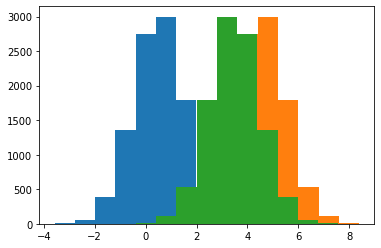

In [124]:
plt.hist(xx)
plt.hist(yy)
plt.hist(yy2)

In [125]:
from scipy.stats import norm, gumbel_r

In [126]:
xx = gumbel_r.rvs(1,1,100000)
yy = gumbel_r.cdf(xx,1,1)

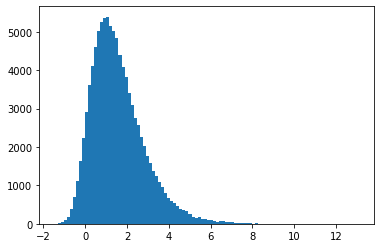

In [127]:
_,_,_=plt.hist(xx,bins=100)

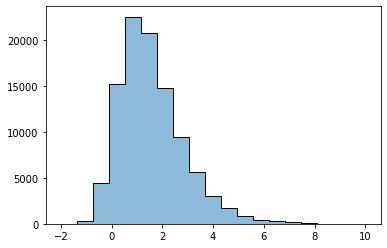

In [128]:
theta = 0
alpha = np.cos(theta)
zz = alpha*(yy-0.5)+0.5
ww = gumbel_r.ppf(zz,1,1)

_,_,_=plt.hist(xx,bins=np.linspace(-2,10,20),alpha=0.5)
_,_,_=plt.hist(ww,bins=np.linspace(-2,10,20),histtype="step",color="black")

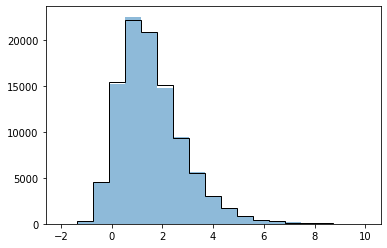

In [129]:
theta = np.pi
alpha = np.cos(theta)
zz = alpha*(yy-0.5)+0.5
ww = gumbel_r.ppf(zz,1,1)

_,_,_=plt.hist(xx,bins=np.linspace(-2,10,20),alpha=0.5)
_,_,_=plt.hist(ww,bins=np.linspace(-2,10,20),histtype="step",color="black")

In [130]:
xx2 = np.random.normal(0,1,100000)
yy2 = gumbel_r.cdf(xx2,1,1)

(array([56069., 13153.,  9189.,  6911.,  5260.,  4028.,  2747.,  1714.,
          760.,   169.]),
 array([8.13577477e-106, 9.68722360e-002, 1.93744472e-001, 2.90616708e-001,
        3.87488944e-001, 4.84361180e-001, 5.81233416e-001, 6.78105652e-001,
        7.74977888e-001, 8.71850124e-001, 9.68722360e-001]),
 <a list of 10 Patch objects>)

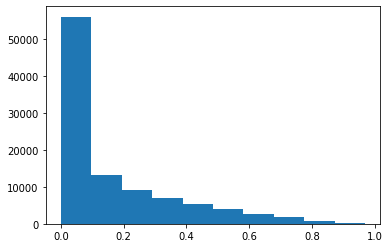

In [131]:
plt.hist(yy2)

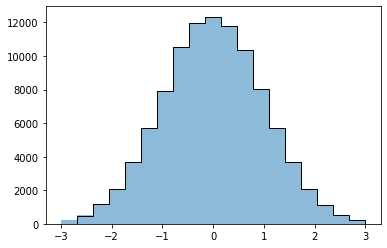

In [132]:
theta = 0
alpha = np.cos(theta)
zz2 = alpha*(yy2-0.5)+0.5
ww2 = gumbel_r.ppf(zz2,1,1)

_,_,_=plt.hist(xx2,bins=np.linspace(-3,3,20),alpha=0.5)
_,_,_=plt.hist(ww2,bins=np.linspace(-3,3,20),histtype="step",color="black")

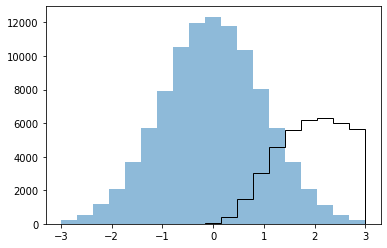

In [133]:
theta = np.pi
alpha = np.cos(theta)
zz2 = alpha*(yy2-0.5)+0.5
ww2 = gumbel_r.ppf(zz2,1,1)

_,_,_=plt.hist(xx2,bins=np.linspace(-3,3,20),alpha=0.5)
_,_,_=plt.hist(ww2,bins=np.linspace(-3,3,20),histtype="step",color="black")

In [188]:
nbins = 1000
Nevents = 1000000

xx = gumbel_r.rvs(1,1,Nevents)
xx2 = np.random.normal(0,1,Nevents)

mylosses_g = []
mylosses_g2 = []
for theta in np.linspace(0,3.2,20):

    yy = gumbel_r.cdf(xx,1,1)
    alpha = np.cos(theta)
    zz = alpha*(yy-0.5)+0.5
    ww = gumbel_r.ppf(zz,1,1)

    n,b=np.histogram(xx,bins=np.linspace(-3,15,nbins))
    n2,_=np.histogram(ww,bins=np.linspace(-3,15,nbins))

    h = n/(n+n2+0.0001)
    def myh(x):
        return np.interp(x,0.5*(b[0:-1]+b[1:]),h)
    
    #plt.hist(xx,bins=np.linspace(-3,15,100))
    #plt.hist(ww,bins=np.linspace(-3,15,100),histtype="step",color="black")
    #plt.show()
    
    mylosses_g+=[np.mean(-np.log(0.000001+myh(xx)) - np.log(0.000001+1.-myh(ww)))]
    
    #Now, for the second term.
    yy2 = gumbel_r.cdf(xx2,1,1)
    zz2 = alpha*(yy2-0.5)+0.5
    ww2 = gumbel_r.ppf(zz2,1,1)

    N,b=np.histogram(xx2,bins=np.linspace(-3,15,nbins))
    N2,_=np.histogram(ww2,bins=np.linspace(-3,15,nbins))

    H = N/(N+N2+0.0001)
    def myh2(x):
        return np.interp(x,0.5*(b[0:-1]+b[1:]),H)
    
    #plt.hist(xx2,bins=np.linspace(-3,15,100))
    #plt.hist(ww2,bins=np.linspace(-3,15,100),histtype="step",color="black")
    #plt.show()
    
    mylosses_g2+=[np.mean(-np.log(0.000001+myh(xx)) - np.log(0.000001+1.-myh(ww)))+np.mean(-np.log(0.000001+myh2(xx2)) - np.log(0.000001+1.-myh2(ww2)))]

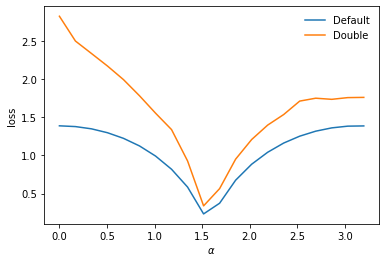

In [189]:
plt.plot(np.linspace(0,3.2,20),mylosses_g,label="Default")
plt.plot(np.linspace(0,3.2,20),mylosses_g2,label="Double")
plt.xlabel(r"$\alpha$")
plt.ylabel("loss")
plt.legend(frameon=False)